# Customer segemntation

## Introduction:
Customer segmentation is a critical strategy in marketing that allows businesses to understand the diversity in their customer base and tailor their marketing efforts to specific groups. In this project, we employ data science techniques to segment customers based on their behavioral data. By utilizing Python, we implement clustering algorithms to identify distinct customer segments, providing valuable insights that can enhance marketing efficiency and optimize resource allocation.

## Objectives:
To segment customers based on their engagement and acquisition channels.

To identify key factors that differentiate various customer segments.

To implement clustering techniques (K-means and hierarchical clustering) for meaningful data segmentation.

To analyze the impact of different marketing channels on customer lifetime value (CLV) and engagement.

To provide actionable insights that inform personalized marketing strategies.


## Requirements:
Technical Setup:

Python 3.x

Jupyter Notebook

Installed libraries:

pandas

NumPy

Matplotlib

Seaborn (optional)

Scipy

Scikit-learn

## Data Files:

Customer dataset (CSV): Contains data on customer demographics, CLV, and acquisition channels.

Segmentation data legend (Excel): Describes the data fields and provides details about the variables.

# importign libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics

## EDA

In [2]:
# reading the dataset
data= pd.read_csv(r"C:\Users\compu magic\Downloads\customer_segmentation_data.csv")

# cnverting the data into dataframe
df=pd.DataFrame(data)
df.head(5)

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [3]:
df.info

<bound method DataFrame.info of       minutes_watched     CLV  region  channel
0              3197.0  205.42       2        4
1                63.0  149.99       0        1
2               605.0  119.00       2        2
3                20.0  240.00       2        4
4               245.0  184.36       1        4
...               ...     ...     ...      ...
3829             11.0   79.00       0        3
3830             28.0   79.00       0        2
3831             57.0   36.00       2        2
3832             44.0   36.00       2        1
3833              NaN   79.00       0        3

[3834 rows x 4 columns]>

In [4]:
# columns data type
df.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

In [5]:
# number of null values 
df.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [6]:
# filling null values with zero to represent people who didn't watch content
df['minutes_watched'].fillna(0, inplace=True)

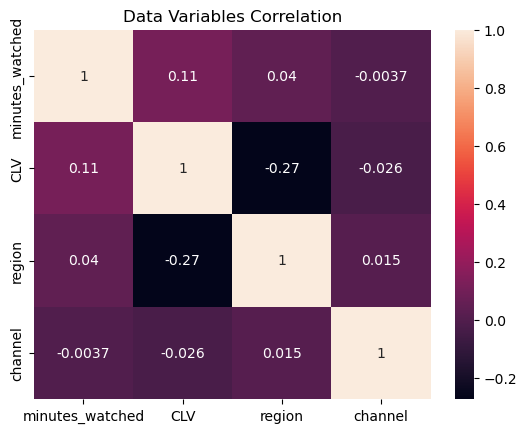

In [7]:
# Correlation between variables
corr = df.corr()

# Generating the cubehelix color palette as a colormap
cmap =sns.color_palette("rocket", as_cmap=True)
# Plotting the correlation heatmap
sns.heatmap(corr, cmap=cmap, annot=True)  # Adding 'annot=True' to display correlation values

plt.title("Data Variables Correlation")
plt.show()

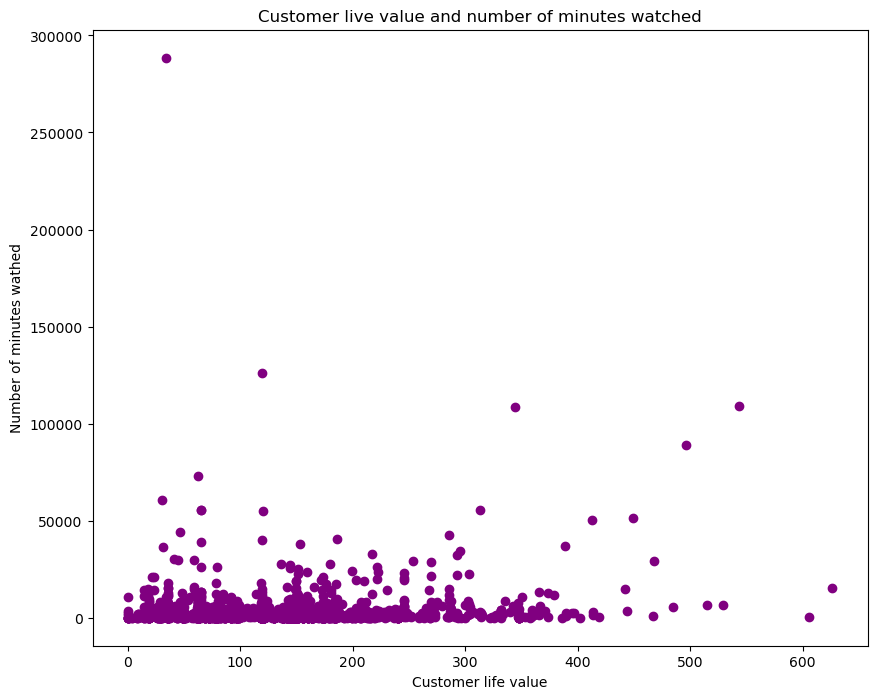

In [8]:
# setting figure size
fig, ax = plt.subplots(figsize=(10,8))

# Generating the cubehelix color palette as a colormap
cmap =sns.color_palette("rocket", as_cmap=True)

# ploting scatter plot
plt.scatter(x= df['CLV'], y=df['minutes_watched'], color= 'purple')

#plot title
plt.title("Customer live value and number of minutes watched")

# Axis labels
plt.xlabel("Customer life value")
plt.ylabel("Number of minutes wathed")
plt.show()

In [9]:
regions= {0: "USA, Canada, United Kingdom, Australia",
         1:"Western Europe",
         2:"Rest of the World"
         }
df["region_org"]= df['region'].map(regions)
df["region_org"]

0                            Rest of the World
1       USA, Canada, United Kingdom, Australia
2                            Rest of the World
3                            Rest of the World
4                               Western Europe
                         ...                  
3829    USA, Canada, United Kingdom, Australia
3830    USA, Canada, United Kingdom, Australia
3831                         Rest of the World
3832                         Rest of the World
3833    USA, Canada, United Kingdom, Australia
Name: region_org, Length: 3834, dtype: object

In [10]:
channel_map= {1: "Google",
            2: "Facebook",
            3: "YouTube",
            4: "LinkedIn",
            5: "Twitter",
            6: "Instagram",
            7: "Friend",
            8: "Other"
            }
df["channels_org"]= df['channel'].map(channel_map)
df["channels_org"]

0       LinkedIn
1         Google
2       Facebook
3       LinkedIn
4       LinkedIn
          ...   
3829     YouTube
3830    Facebook
3831    Facebook
3832      Google
3833     YouTube
Name: channels_org, Length: 3834, dtype: object

In [11]:
# creating dummy variables for regions column
region_dummy = pd.get_dummies(df["region_org"])

# concatenating the dummy variables with the dataframe
df= pd.concat([df, region_dummy], axis=1)

In [12]:
# creating dummy variables for channels column
channel_dummy= pd.get_dummies(df["channels_org"])

# concatenating the dummy variables with the dataframe
df= pd.concat([df, channel_dummy], axis=1)

In [13]:
df

,minutes_watched,CLV,region,channel,region_org,channels_org,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube
0,3197.0,205.42,2,4,Rest of the World,LinkedIn,True,False,False,False,False,False,False,True,False,False,False
1,63.0,149.99,0,1,"USA, Canada, United Kingdom, Australia",Google,False,True,False,False,False,True,False,False,False,False,False
2,605.0,119.00,2,2,Rest of the World,Facebook,True,False,False,True,False,False,False,False,False,False,False
3,20.0,240.00,2,4,Rest of the World,LinkedIn,True,False,False,False,False,False,False,True,False,False,False
4,245.0,184.36,1,4,Western Europe,LinkedIn,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,3,"USA, Canada, United Kingdom, Australia",YouTube,False,True,False,False,False,False,False,False,False,False,True
3830,28.0,79.00,0,2,"USA, Canada, United Kingdom, Australia",Facebook,False,True,False,True,False,False,False,False,False,False,False
3831,57.0,36.00,2,2,Rest of the World,Facebook,True,False,False,True,False,False,False,False,False,False,False
3832,44.0,36.00,2,1,Rest of the World,Google,True,False,False,False,False,True,False,False,False,False,False


In [14]:
df_segmented= df.drop(columns= ['channels_org', 'region_org'] )
df_segmented

,minutes_watched,CLV,region,channel,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube
0,3197.0,205.42,2,4,True,False,False,False,False,False,False,True,False,False,False
1,63.0,149.99,0,1,False,True,False,False,False,True,False,False,False,False,False
2,605.0,119.00,2,2,True,False,False,True,False,False,False,False,False,False,False
3,20.0,240.00,2,4,True,False,False,False,False,False,False,True,False,False,False
4,245.0,184.36,1,4,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,3,False,True,False,False,False,False,False,False,False,False,True
3830,28.0,79.00,0,2,False,True,False,True,False,False,False,False,False,False,False
3831,57.0,36.00,2,2,True,False,False,True,False,False,False,False,False,False,False
3832,44.0,36.00,2,1,True,False,False,False,False,True,False,False,False,False,False


# Hierarchical clustering implementaion

In [15]:
# scaling the dataset
scaler= StandardScaler()

#fitting the data
df_scaled= scaler.fit_transform(df_segmented)

In [16]:
# Perform hierarchical clustering using Ward's method
model= linkage(df_scaled, method = 'ward')

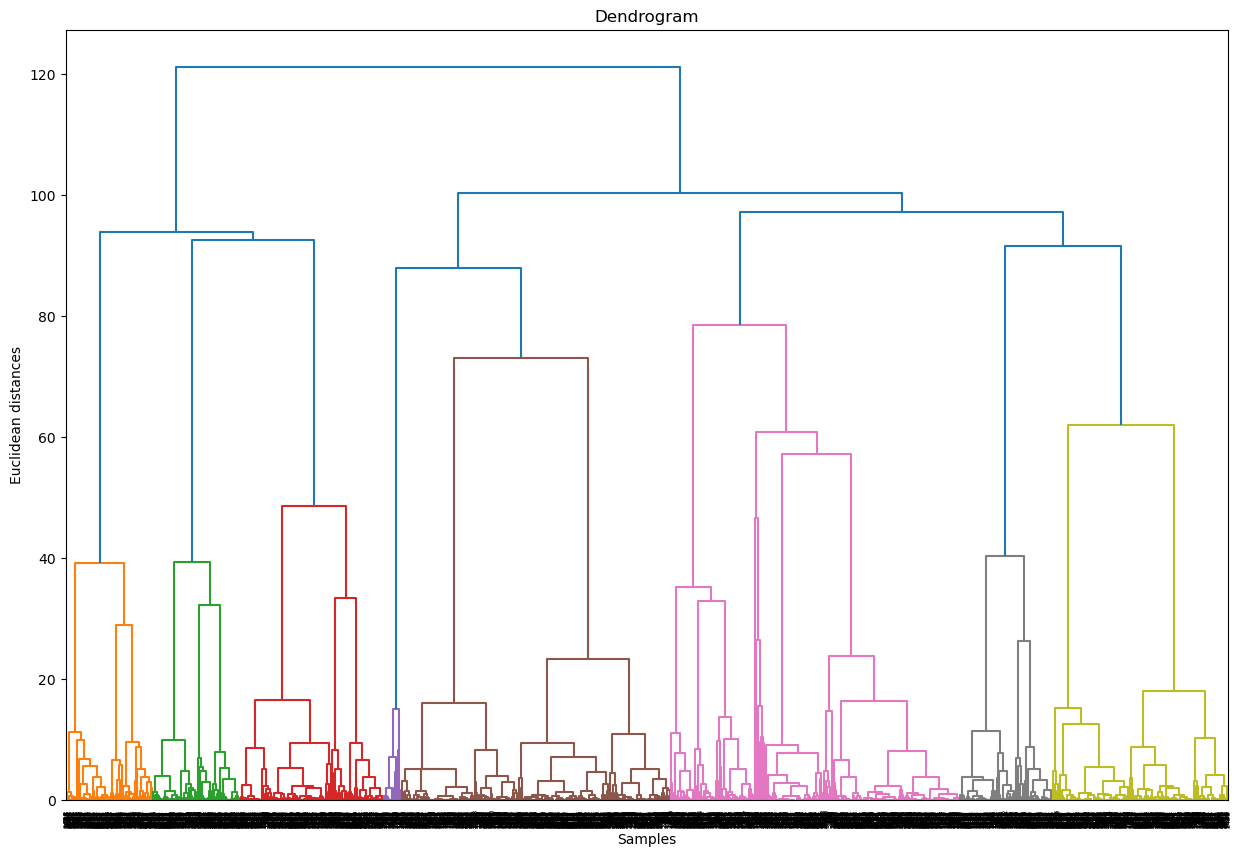

In [44]:
# Setting the figure size for the plot.
plt.figure(figsize = (15,10))

# Plot Dendrogram to visualize the clusters
dendrogram(model,p=5)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

## K-Means clustring implementation

In [32]:
# traning k-means model
WCSS=[]
for K in range(1,10):
  kmeans=KMeans(n_clusters=K, init = 'k-means++',random_state=42)
  kmeans.fit(df_scaled)
  WCSS.append(kmeans.inertia_)
WCSS

C:\Users\compu magic\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\compu magic\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\compu magic\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\compu magic\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

[57509.999999999985,
 46808.20898539806,
 41581.158031526356,
 37648.56780914592,
 34348.718645644105,
 30494.371074939358,
 27182.892328350757,
 23348.396912903016,
 19945.03120287387]

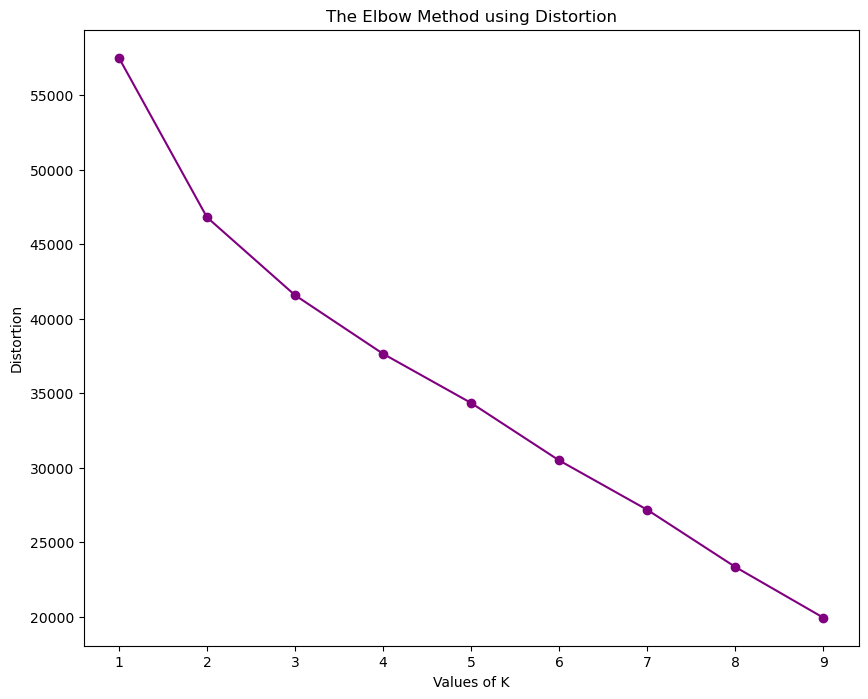

In [33]:
# Setting the figure size for the plot.
plt.figure(figsize = (10,8))
# ploting the number of clusters 
plt.plot(range(1,10), WCSS, marker = 'o', color= 'purple')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [34]:
num_clusters= 8

k_model=KMeans(n_clusters=num_clusters, init = 'k-means++',random_state=42)

#fitting the data to the final model
y_kmeans= k_model.fit(df_scaled)


C:\Users\compu magic\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Hierarechal clustering 

In [35]:
# Creating a copy of the original dataframe 
df_kmeans = df_segmented.copy()

# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_kmeans['Segment'] = kmeans.labels_

In [36]:
pd.set_option('display.max_columns', 500)

In [37]:
# analyzing segmants 
# calculationg the mean for each segment 
df_kmeans_analysis= df_kmeans.groupby(['Segment']).mean()
df_kmeans_analysis

,minutes_watched,CLV,region,channel,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube
Segment,,,,,,,,,,,,,,,
0,1800.537897,111.313594,1.801956,1.00000,0.801956,0.000000,0.198044,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
1,1455.844542,136.704388,0.000000,2.63065,0.000000,1.000000,0.000000,0.0,0.0,0.288864,0.0,0.208379,0.0,0.0,0.502756
2,2006.190377,113.654038,1.372385,7.00000,0.629707,0.257322,0.112971,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,2462.978056,119.857821,1.800940,3.00000,0.800940,0.000000,0.199060,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
4,1763.190889,100.376616,1.848156,4.00000,0.848156,0.000000,0.151844,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
5,1299.332180,115.180277,1.186851,6.00000,0.498270,0.311419,0.190311,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000
6,985.327586,93.151552,1.603448,5.00000,0.775862,0.172414,0.051724,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000
7,2767.643791,108.260359,1.323529,2.00000,0.611111,0.287582,0.101307,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
8,2314.083333,123.189965,0.833333,8.00000,0.347222,0.513889,0.138889,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000


In [38]:
# Number of observation in each segment
df_kmeans_analysis['n_obs']= df_kmeans[['Segment', 'Google']].groupby(['Segment']).count()

#proportion of observations in each segment
df_kmeans_analysis['prop_obs']= df_kmeans_analysis['n_obs']/ df_kmeans_analysis['n_obs'].sum()

df_kmeans_analysis

,minutes_watched,CLV,region,channel,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube,n_obs,prop_obs
Segment,,,,,,,,,,,,,,,,,
0,1800.537897,111.313594,1.801956,1.00000,0.801956,0.000000,0.198044,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,409,0.106677
1,1455.844542,136.704388,0.000000,2.63065,0.000000,1.000000,0.000000,0.0,0.0,0.288864,0.0,0.208379,0.0,0.0,0.502756,907,0.236568
2,2006.190377,113.654038,1.372385,7.00000,0.629707,0.257322,0.112971,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,478,0.124674
3,2462.978056,119.857821,1.800940,3.00000,0.800940,0.000000,0.199060,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,638,0.166406
4,1763.190889,100.376616,1.848156,4.00000,0.848156,0.000000,0.151844,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,461,0.120240
5,1299.332180,115.180277,1.186851,6.00000,0.498270,0.311419,0.190311,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,289,0.075378
6,985.327586,93.151552,1.603448,5.00000,0.775862,0.172414,0.051724,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,58,0.015128
7,2767.643791,108.260359,1.323529,2.00000,0.611111,0.287582,0.101307,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,306,0.079812
8,2314.083333,123.189965,0.833333,8.00000,0.347222,0.513889,0.138889,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,288,0.075117


In [39]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_kmeans_analysis.rename({0: 'Instagram Enthusiasts',
                        1: 'LinkedIn Connectors',
                        2: 'Friends\' Circle Influencers',
                        3: 'Google-YouTube Browsers',
                        4: 'Anglo-Saxon Omni-Channel',
                        5: 'European Omni-Channel',
                        6: 'Twitter Enthusiasts',
                        7: 'Facebook Fans',
                        })

,minutes_watched,CLV,region,channel,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube,n_obs,prop_obs
Segment,,,,,,,,,,,,,,,,,
Instagram Enthusiasts,1800.537897,111.313594,1.801956,1.00000,0.801956,0.000000,0.198044,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,409,0.106677
LinkedIn Connectors,1455.844542,136.704388,0.000000,2.63065,0.000000,1.000000,0.000000,0.0,0.0,0.288864,0.0,0.208379,0.0,0.0,0.502756,907,0.236568
Friends' Circle Influencers,2006.190377,113.654038,1.372385,7.00000,0.629707,0.257322,0.112971,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,478,0.124674
Google-YouTube Browsers,2462.978056,119.857821,1.800940,3.00000,0.800940,0.000000,0.199060,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,638,0.166406
Anglo-Saxon Omni-Channel,1763.190889,100.376616,1.848156,4.00000,0.848156,0.000000,0.151844,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,461,0.120240
European Omni-Channel,1299.332180,115.180277,1.186851,6.00000,0.498270,0.311419,0.190311,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,289,0.075378
Twitter Enthusiasts,985.327586,93.151552,1.603448,5.00000,0.775862,0.172414,0.051724,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,58,0.015128
Facebook Fans,2767.643791,108.260359,1.323529,2.00000,0.611111,0.287582,0.101307,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,306,0.079812
8,2314.083333,123.189965,0.833333,8.00000,0.347222,0.513889,0.138889,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,288,0.075117


In [40]:
# naming the cluster nubers to labels 
df_kmeans['Labels']= df_kmeans['Segment'].map({
    0: 'Instagram Enthusiasts',
    1: 'LinkedIn Connectors',
    2: 'Friends\' Circle Influencers',
    3: 'Google-YouTube Browsers',
    4: 'Anglo-Saxon Omni-Channel',
    5: 'European Omni-Channel',
    6: 'Twitter Enthusiasts',
    7: 'Facebook Fans',
})


In [41]:
df_kmeans

,minutes_watched,CLV,region,channel,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,LinkedIn,Other,Twitter,YouTube,Segment,Labels
0,3197.0,205.42,2,4,True,False,False,False,False,False,False,True,False,False,False,4,Anglo-Saxon Omni-Channel
1,63.0,149.99,0,1,False,True,False,False,False,True,False,False,False,False,False,1,LinkedIn Connectors
2,605.0,119.00,2,2,True,False,False,True,False,False,False,False,False,False,False,7,Facebook Fans
3,20.0,240.00,2,4,True,False,False,False,False,False,False,True,False,False,False,4,Anglo-Saxon Omni-Channel
4,245.0,184.36,1,4,False,False,True,False,False,False,False,True,False,False,False,4,Anglo-Saxon Omni-Channel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,3,False,True,False,False,False,False,False,False,False,False,True,1,LinkedIn Connectors
3830,28.0,79.00,0,2,False,True,False,True,False,False,False,False,False,False,False,7,Facebook Fans
3831,57.0,36.00,2,2,True,False,False,True,False,False,False,False,False,False,False,7,Facebook Fans
3832,44.0,36.00,2,1,True,False,False,False,False,True,False,False,False,False,False,0,Instagram Enthusiasts


C:\Users\compu magic\AppData\Local\Temp\ipykernel_6248\279137809.py:8: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.scatterplot(x=df_kmeans['CLV'], y=df_kmeans['minutes_watched'], hue=df_kmeans['Labels'], palette=palette)


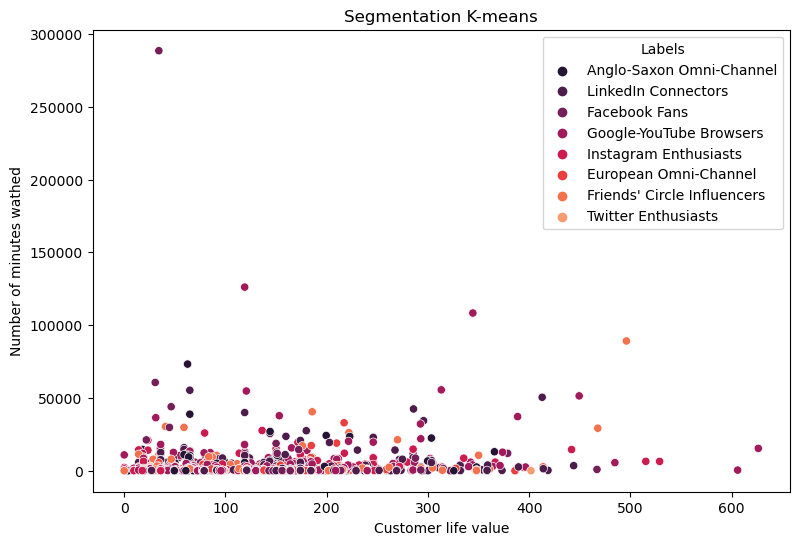

In [43]:
# setting figure size 
fig, ax = plt.subplots(figsize=(9,6))

# Generating the 'rocket' color palette (not as a colormap)
palette = sns.color_palette("rocket", n_colors=len(df_kmeans['Labels'].unique()))

# Creating a scatter plot for the analyzed dataframe
sns.scatterplot(x=df_kmeans['CLV'], y=df_kmeans['minutes_watched'], hue=df_kmeans['Labels'], palette=palette)
#plot title
plt.title("Segmentation K-means")

# axis names
plt.xlabel("Customer life value")
plt.ylabel("Number of minutes wathed")

plt.show()

# Data Interpretation
Key Insights by Segment:

- Twitter Devotees: This group has the smallest number of observations (58). It might be beneficial to reduce marketing efforts on Twitter.
- Facebook Followers: Despite average spending, they have the highest engagement with over 2,700 minutes watched. Investigating their interaction with the platform could be useful.
- Anglo-Saxon Multichannel: High engagement and high CLV make this segment important for targeted marketing.
- Western Europe: Despite having fewer customers, this segment shows the highest CLV, making it a crucial area for marketing expansion.
Regional Performance:

Anglo-Saxon regions (USA, UK, etc.) show the best performance, followed by the rest of the world.
Western Europe, though having fewer customers, exhibits the highest CLV, indicating potential for growth.
Channel Performance:

LinkedIn and Facebook are the most successful acquisition channels for the rest of the world, while Google and YouTube perform best in the Anglo-Saxon region.
## Part 4: Data Interpretation

### Key Insights by Segment:
- Twitter Devotees: This group has the smallest number of observations (58). It might be beneficial to reduce marketing efforts on Twitter.
- Facebook Followers: Despite average spending, they have the highest engagement with over 2,700 minutes watched. Investigating their interaction with the platform could be useful.
- Anglo-Saxon Multichannel: High engagement and high CLV make this segment important for targeted marketing.
- Western Europe: Despite having fewer customers, this segment shows the highest CLV, making it a crucial area for marketing expansion.

### Regional Performance:
- Anglo-Saxon regions (USA, UK, etc.) show the best performance, followed by the rest of the world.
- Western Europe, though having fewer customers, exhibits the highest CLV, indicating potential for growth.

### Channel Performance:
- LinkedIn and Facebook are the most successful acquisition channels for the rest of the world.
- Google and YouTube perform best in the Anglo-Saxon region.